In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("C:/Users/Harvey/Downloads/machine_learning_scatter.csv")
df.head(3)

,x,y,color
0,23.199982,237.800003,blue
1,24.199982,237.800003,blue
2,25.199982,236.800003,blue


In [3]:
# In this cell, we are setting 

X = df[['x', 'y']].values
y = df['color'] 

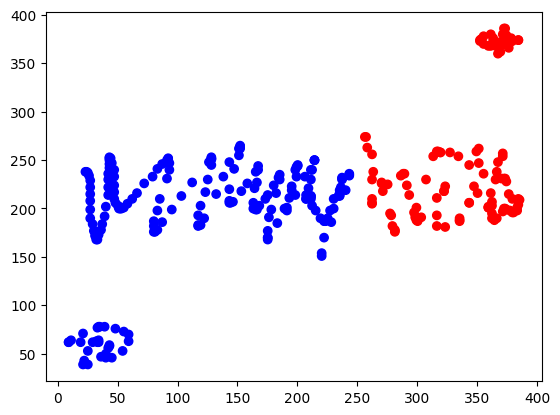

In [4]:
# Setting X[:, 0] as the x parameter of the plot and X[:, 1] as the y parameter according to our dataset.
# 
plt.scatter(X[:, 0], X[:, 1], c=df['color']);

## Apply a quantile scaler for the data according to their quantile to lessen outlier effects

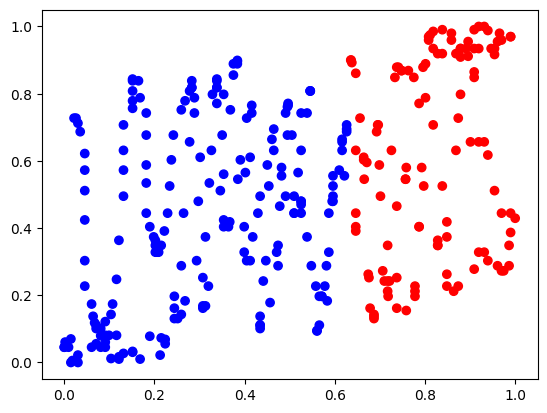

In [5]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=df['color']);

## Why do we need to use quantile transform instead of standard scaler?

In [6]:
# Defining a function where we accept a scaler for the pipeline, and use KNN as a supervised machine learning classifier

def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    # overal display is 12x3 inches size
    plt.figure(figsize=(12, 3))
    
    # first plot for original data, 1 row, 3 cols, position 1
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=df['color'])
    plt.title("Original Data")
    
    # second plot for transformed data position 2
    plt.subplot(132)
    # applying the scaler transformation here
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=df['color'])
    plt.title("Transformed Data")
    
    # third plot for mass generated data in position 3
    plt.subplot(133)
    #  Creates 5000 random points within the data range
    #  Uses the pipeline to predict probabilities for these points
    #  Visualizes the decision boundary by coloring based on prediction probabilities
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)  
    # Get predictions (classes instead of probabilities)
    y_pred = pipe.predict(X_new)

    # Create color map from original colors
    color_map = dict(zip(y.unique(), df["color"].unique()))
    predicted_colors = [color_map[pred] for pred in y_pred]

    # Plot with predicted colors
    plt.scatter(X_new[:, 0], X_new[:, 1], c=predicted_colors, alpha=0.7)
    plt.title("Predicted Data")

### Using the standard scaler as a means of scaling the data, as we see, outliers still has a huge significant impact on the data even if you standard scale.

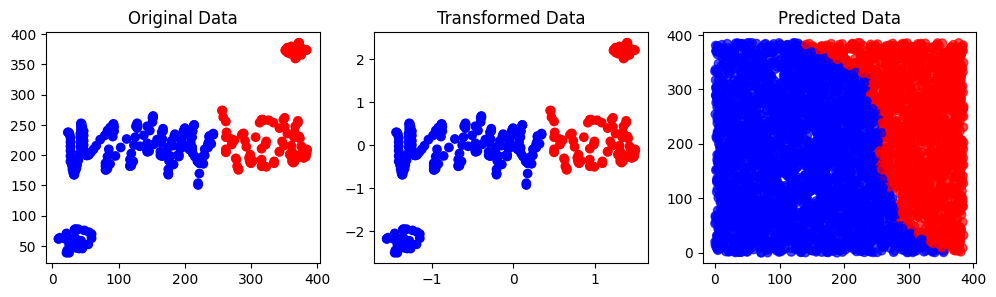

In [7]:
plot_output(scaler=StandardScaler())

### Outliers still has a huge significant impact on the data even if you standard scale, hence the quantile scaling if you want outliers to have lesser impact to the produced model


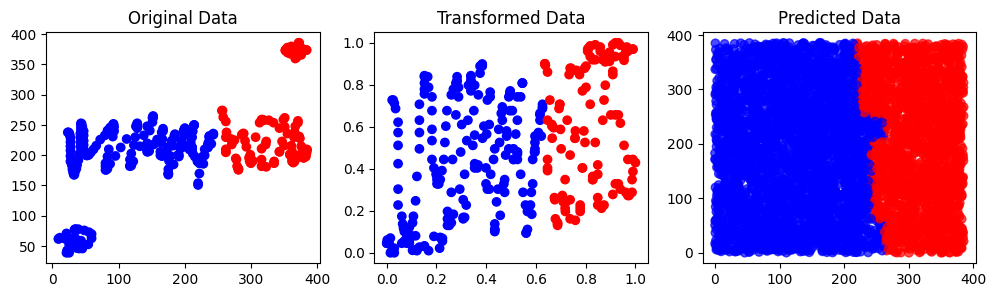

In [8]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

## ----------------------------------------------------------
# Testing multiple category cluster of data
## ----------------------------------------------------------

In [9]:
df = pd.read_csv("C:/Users/Harvey/Downloads/machine_learning_scatter_2.csv")
df.head(3)

,x,y,color
0,23.199982,237.800003,blue
1,24.199982,237.800003,blue
2,25.199982,236.800003,blue


In [10]:
# In this cell, we are setting the x and y values to be the features, and the color value to be the result

X = df[['x', 'y']].values
y = df['color']

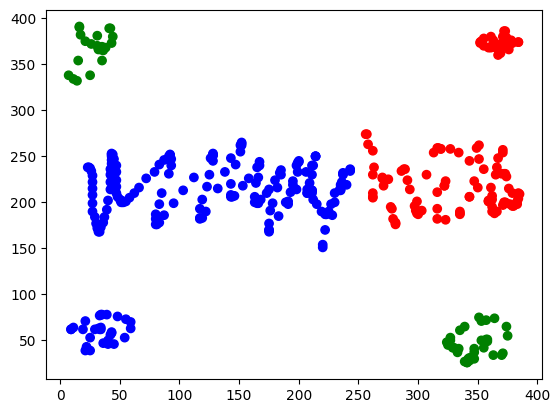

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=df['color'])

In [12]:
from sklearn.preprocessing import OneHotEncoder

def plot_output(scaler):
    # Add one-hot encoding to the pipeline
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])
    
    
    # Convert to NumPy array and reshape
    reshaped_texts = np.array(y).reshape(-1, 1)

    enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    y_encoded = enc.fit_transform(reshaped_texts)

    
    pred = pipe.fit(X, y_encoded).predict(X)
    
    # Create color mapping using the encoder categories
    color_map = dict(zip(range(len(enc.categories_[0])), enc.categories_[0]))
    
    plt.figure(figsize=(12, 3))
    
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=df['color'])
    plt.title("Original Data")
    
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=df['color'])
    plt.title("Transformed Data")
    
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    
    y_pred = pipe.predict(X_new)
    y_pred_categorized = enc.inverse_transform(y_pred)
    
    y_pred_array = y_pred_categorized.tolist()
    
    predicted_colors = [pred for pred in y_pred]
    plt.scatter(X_new[:, 0], X_new[:, 1], c=predicted_colors, alpha=0.7)
    
    # Add legend
    for yi, color in color_map.items():
        plt.scatter([], [], c=color, label=f'Class {yi}')
    plt.legend()
    plt.title("Predicted Data")

## Visualizing the impact of quantile transform vs standard scaler on multiple categories

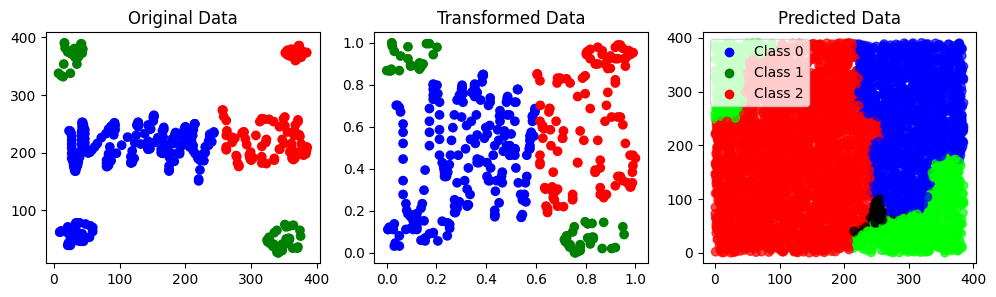

In [13]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

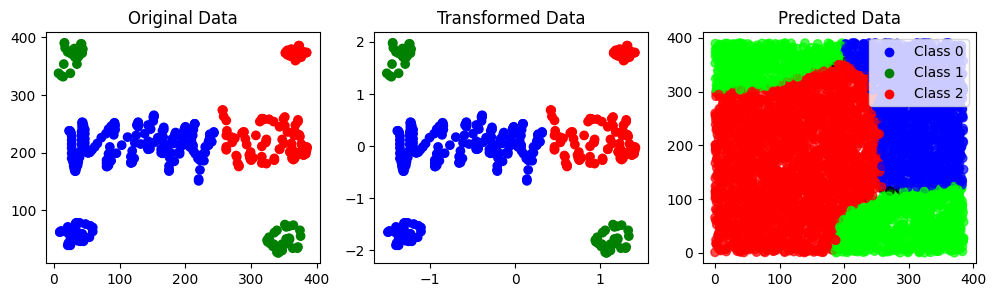

In [14]:
plot_output(scaler=StandardScaler())